In [1]:
# Importamos la biblioteca pandas con un alias 'pd'
import pandas as pd
# Importamos la biblioteca numpy con un alias 'np'
import numpy as np
# Importamos la biblioteca csv
import csv
# Importamos la biblioteca re (expresiones regulares)
import re
# Importamos la biblioteca string (operaciones con cadenas)
import string
# Importamos la biblioteca time (manejo del tiempo)
import time
# Importamos submódulos específicos de scikit-learn (sklearn)
from sklearn import preprocessing, model_selection, naive_bayes, svm
# Importamos clases específicas de sklearn para el procesamiento de texto
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# Importamos funciones específicas de sklearn para evaluar modelos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Importamos el módulo pyplot de la biblioteca matplotlib con un alias 'plt'
import matplotlib.pyplot as plt
# Importamos la biblioteca seaborn con un alias 'sns'
import seaborn as sns
# Configuración de visualización para matplotlib (usado en cuadernos Jupyter)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=fbf3e1d0352ec1dd304fb2625f2a723e8a36fa452ea7f6692f701aa1b6f06696
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [3]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
data = spark.read.csv('comentarios.csv', header=True, sep=";")
data.show(5)

+------+---------------+-----------+----------------+------------------+
|Codigo|           Name| Profile ID|            Date|           Comment|
+------+---------------+-----------+----------------+------------------+
|     1|   leenah.aho57|48304491865|13/09/2023 13:57|That is sooo cool!|
|     2|rinabetancourt_|  494971994|13/09/2023 13:58|                🔥|
|     3|     andresib25|  176009242|13/09/2023 13:59|                🙌|
|     4|      adevesi15| 3247722427|13/09/2023 14:03|           Hermoso|
|     5|   adriananovam|  498154903|13/09/2023 14:12|        Wooow ❤️😍|
+------+---------------+-----------+----------------+------------------+
only showing top 5 rows



In [4]:
data.printSchema()

root
 |-- Codigo: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Profile ID: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Comment: string (nullable = true)



In [5]:
df = data.toPandas()
print(df)

   Codigo                  Name   Profile ID              Date  \
0       1          leenah.aho57  48304491865  13/09/2023 13:57   
1       2       rinabetancourt_    494971994  13/09/2023 13:58   
2       3            andresib25    176009242  13/09/2023 13:59   
3       4             adevesi15   3247722427  13/09/2023 14:03   
4       5          adriananovam    498154903  13/09/2023 14:12   
..    ...                   ...          ...               ...   
85     86      figueroajudith34   3889777976  24/09/2023 02:51   
86     87               jhq2993   1746850786  28/09/2023 14:39   
87     88            art6815var  47679479373  29/09/2023 00:41   
88     89  cris.talvillareal530  48774163389  30/09/2023 19:58   
89     90         chuz_barquero   2278669509   2/10/2023 21:49   

                                              Comment  
0                                  That is sooo cool!  
1                                                   🔥  
2                                      

In [6]:
df.size # Esto imprimirá el número total de elementos en el DataFrame

450

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [8]:
#VADER es una biblioteca especificamente diseñada para el análisis de sentimientos en texto de redes sociales

from nltk.sentiment import SentimentIntensityAnalyzer

In [9]:
sia= SentimentIntensityAnalyzer()

In [10]:
#Creamos una funcion que me devuelva la etiqueta en base a los rangos que yo le asigne
def analizar_sentimiento(texto):
    sia=SentimentIntensityAnalyzer()
    sentimiento=sia.polarity_scores(texto)["compound"]

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"

In [11]:
df['Sentimiento']=df['Comment'].apply(analizar_sentimiento)
df.head(10)

,Codigo,Name,Profile ID,Date,Comment,Sentimiento
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is sooo cool!,Sentimiento Positivo
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral
3,4,adevesi15,3247722427,13/09/2023 14:03,Hermoso,Sentimiento Neutral
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral
6,7,cesar_liao,490358251,13/09/2023 14:22,La botaron 😍que marketing tan duro 😍🔥❤️,Sentimiento Neutral
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwww❤️❤️❤️ Samsung realmente es impresionant...,Sentimiento Neutral
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral


In [12]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=9e89b1957f0a4994abbbed02f07323e1df2c4b9a4eee84025943920fbb5788d8
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling 

In [13]:
from googletrans import Translator

# Crear una instancia del traductor
translator = Translator()

# Función para traducir un texto de español a inglés
def traducir_a_ingles(Comment):
    translation = translator.translate(Comment, src='es', dest='en')
    return translation.text

# Aplicar la función de traducción a la columna 'texto' y crear una nueva columna 'texto_ingles'
df['comment_ingles'] = df['Comment'].apply(traducir_a_ingles)

# Imprimir el DataFrame resultante
print(df)

   Codigo                  Name   Profile ID              Date  \
0       1          leenah.aho57  48304491865  13/09/2023 13:57   
1       2       rinabetancourt_    494971994  13/09/2023 13:58   
2       3            andresib25    176009242  13/09/2023 13:59   
3       4             adevesi15   3247722427  13/09/2023 14:03   
4       5          adriananovam    498154903  13/09/2023 14:12   
..    ...                   ...          ...               ...   
85     86      figueroajudith34   3889777976  24/09/2023 02:51   
86     87               jhq2993   1746850786  28/09/2023 14:39   
87     88            art6815var  47679479373  29/09/2023 00:41   
88     89  cris.talvillareal530  48774163389  30/09/2023 19:58   
89     90         chuz_barquero   2278669509   2/10/2023 21:49   

                                              Comment           Sentimiento  \
0                                  That is sooo cool!  Sentimiento Positivo   
1                                                

In [14]:
df['Sentimiento']=df['comment_ingles'].apply(analizar_sentimiento)
df.head(10)

,Codigo,Name,Profile ID,Date,Comment,Sentimiento,comment_ingles
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is sooo cool!,Sentimiento Positivo,That is soo cool!
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral,🔥
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral,🙌
3,4,adevesi15,3247722427,13/09/2023 14:03,Hermoso,Sentimiento Positivo,Beautiful
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral,Wooow ❤️😍
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral,😮
6,7,cesar_liao,490358251,13/09/2023 14:22,La botaron 😍que marketing tan duro 😍🔥❤️,Sentimiento Negativo,They threw it out so hard marketing 😍🔥❤️
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwww❤️❤️❤️ Samsung realmente es impresionant...,Sentimiento Neutral,Wowwwware ining
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral,😍😍😍
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral,Guaaaoo 😍


In [ ]:
# Eliminar las columnas 'Comment' y 'Sentimiento'
columnas_a_eliminar = ['Comment', 'Sentimiento']
df = df.drop(columns=columnas_a_eliminar)

# Imprimir el DataFrame resultante
df.head(10)

In [16]:
#Creamos una funcion que me devuelva la etiqueta en base a los rangos que yo le asigne
def analizar_sentimiento1(Comment):
    sia=SentimentIntensityAnalyzer()
    sentimiento=sia.polarity_scores(Comment)["compound"]

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"

In [17]:
df['Sentimiento']=df['comment_ingles'].apply(analizar_sentimiento)
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Sentimiento Positivo
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Sentimiento Positivo
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Sentimiento Negativo
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Sentimiento Neutral
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral


In [18]:
# Seleccionar las columnas que deseas imprimir
columnas_a_imprimir = ['comment_ingles', 'Sentimiento']

# Crear un nuevo DataFrame con las columnas seleccionadas
df_seleccionado = df[columnas_a_imprimir]

# Imprimir el DataFrame resultante
print(df_seleccionado)

                                       comment_ingles           Sentimiento
0                                   That is soo cool!  Sentimiento Positivo
1                                                   🔥   Sentimiento Neutral
2                                                   🙌   Sentimiento Neutral
3                                           Beautiful  Sentimiento Positivo
4                                           Wooow ❤️😍   Sentimiento Neutral
..                                                ...                   ...
85                       ❤️ I love Deno but I can't 😢  Sentimiento Positivo
86  Unfortunately I cannot recommend that my flip ...  Sentimiento Negativo
87                                         Incredible   Sentimiento Neutral
88   What is the price of the Samsung S Medium Tablet   Sentimiento Neutral
89  @n3lson_1407 how do you know if the 5 have les...  Sentimiento Negativo

[90 rows x 2 columns]


In [19]:
# Especifica la ruta y el nombre del archivo CSV en el que deseas guardar los datos
archivo_csv = 'datos_seleccionados.csv'

# Exporta el DataFrame a un archivo CSV
df_seleccionado.to_csv(archivo_csv, index=False)  # El argumento index=False evita que se incluya una columna de índice en el archivo CSV

print(f'DataFrame exportado a {archivo_csv}')

DataFrame exportado a datos_seleccionados.csv


In [20]:
# Especifica la ruta y el nombre del archivo XLSX en el que deseas guardar los datos
archivo_xlsx = 'datos_seleccionados.xlsx'

# Exporta el DataFrame a un archivo XLSX
df_seleccionado.to_excel(archivo_xlsx, index=False)  # El argumento index=False evita que se incluya una columna de índice en el archivo XLSX

print(f'DataFrame exportado a {archivo_xlsx}')

DataFrame exportado a datos_seleccionados.xlsx


In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el léxico de VADER
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Emoticones que indican Sentimiento Positivo
emoticones_positivos = ["😍", "🔥", "❤️", "😮", "🙌", "💙", "👏🏻", "😂", "✨️", "😈", "👍", "👌🏻"]

# Crear una función que devuelva la etiqueta en base a los rangos que tú asignes
def analizar_sentimiento(comment_ingles):
    sentimiento = sia.polarity_scores(comment_ingles)["compound"]

    # Analizar si el texto contiene emoticones positivos
    for emoticon in emoticones_positivos:
        if emoticon in comment_ingles:
            return "Sentimiento Positivo"

    if sentimiento > 0.1:
        return "Sentimiento Positivo"
    elif sentimiento < 0:
        return "Sentimiento Negativo"
    else:
        return "Sentimiento Neutral"

# Luego, puedes usar esta función para analizar el sentimiento en tus comentarios
df['Sentimiento2'] = df['comment_ingles'].apply(analizar_sentimiento)
df.head(10)  # Seleccionar las columnas que deseas imprimir


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento,Sentimiento2
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Sentimiento Positivo,Sentimiento Positivo
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral,Sentimiento Positivo
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral,Sentimiento Positivo
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Sentimiento Positivo,Sentimiento Positivo
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral,Sentimiento Positivo
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral,Sentimiento Positivo
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Sentimiento Negativo,Sentimiento Positivo
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Sentimiento Neutral,Sentimiento Neutral
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral,Sentimiento Positivo
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral,Sentimiento Positivo


In [22]:
# Eliminar la palabra "Sentimiento" de la columna
df['Sentimiento2'] = df['Sentimiento2'].str.replace('Sentimiento','')

Counter({' Positivo': 64, ' Neutral': 19, ' Negativo': 7})


<Axes: xlabel='Sentimiento2', ylabel='count'>

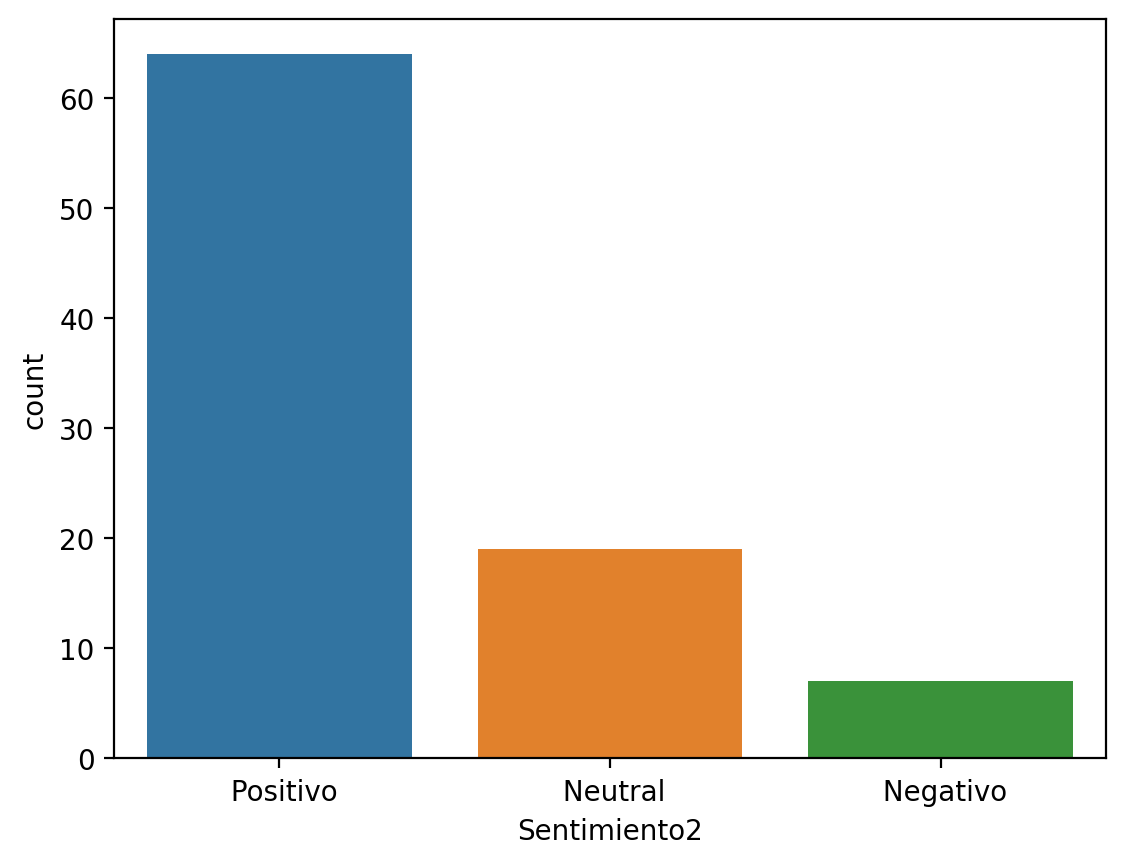

In [23]:
x = df.comment_ingles
y = df.Sentimiento2

from collections import Counter

print(Counter(y))
sns.countplot(x=y)

In [24]:
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento,Sentimiento2
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Sentimiento Positivo,Positivo
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral,Positivo
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral,Positivo
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Sentimiento Positivo,Positivo
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral,Positivo
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral,Positivo
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Sentimiento Negativo,Positivo
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Sentimiento Neutral,Neutral
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral,Positivo
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral,Positivo


In [25]:
df['SCORE'] = df.Sentimiento2

In [26]:
# reemplazar etiqueta pada conjunto de datos
df['SCORE'] = df['Sentimiento2'].map({' Positivo': 1 , ' Negativo': 0, ' Neutral': 2})
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento,Sentimiento2,SCORE
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Sentimiento Positivo,Positivo,1
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Sentimiento Neutral,Positivo,1
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Sentimiento Neutral,Positivo,1
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Sentimiento Positivo,Positivo,1
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Sentimiento Neutral,Positivo,1
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Sentimiento Neutral,Positivo,1
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Sentimiento Negativo,Positivo,1
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Sentimiento Neutral,Neutral,2
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Sentimiento Neutral,Positivo,1
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Sentimiento Neutral,Positivo,1


In [27]:
# Eliminar las columnas 'Comment' y 'Sentimiento'
columnas_a_eliminar = ["SCORE","Sentimiento"]
df = df.drop(columns=columnas_a_eliminar)

# Imprimir el DataFrame resultante
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento2
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Positivo
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Positivo
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Positivo
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Positivo
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Positivo
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Positivo
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Positivo
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Neutral
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Positivo
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Positivo


In [28]:
# Elimina espacios en blanco alrededor de los valores de la columna 'Sentimiento'
df['Sentimiento'] = df['Sentimiento2'].str.strip()

# Mapea los valores de 'Sentimiento' a 'SCORE'
df['SCORE'] = df['Sentimiento'].map({'Positivo': 1, 'Negativo': 0, 'Neutral': 2})

# Imprime el DataFrame
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento2,Sentimiento,SCORE
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Positivo,Positivo,1
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Positivo,Positivo,1
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Positivo,Positivo,1
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Positivo,Positivo,1
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Positivo,Positivo,1
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Positivo,Positivo,1
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Positivo,Positivo,1
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Neutral,Neutral,2
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Positivo,Positivo,1
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Positivo,Positivo,1


In [29]:
# Eliminar las columnas 'Comment' y 'Sentimiento'
columnas_a_eliminar = ["Sentimiento2"]
df = df.drop(columns=columnas_a_eliminar)

# Imprimir el DataFrame resultante
df.head(10)

,Codigo,Name,Profile ID,Date,comment_ingles,Sentimiento,SCORE
0,1,leenah.aho57,48304491865,13/09/2023 13:57,That is soo cool!,Positivo,1
1,2,rinabetancourt_,494971994,13/09/2023 13:58,🔥,Positivo,1
2,3,andresib25,176009242,13/09/2023 13:59,🙌,Positivo,1
3,4,adevesi15,3247722427,13/09/2023 14:03,Beautiful,Positivo,1
4,5,adriananovam,498154903,13/09/2023 14:12,Wooow ❤️😍,Positivo,1
5,6,cesar_liao,490358251,13/09/2023 14:22,😮,Positivo,1
6,7,cesar_liao,490358251,13/09/2023 14:22,They threw it out so hard marketing 😍🔥❤️,Positivo,1
7,8,joniemixxd,1246038823,13/09/2023 14:28,Wowwwware ining,Neutral,2
8,9,soyvale.212,60651910968,13/09/2023 14:28,😍😍😍,Positivo,1
9,10,veritowinnie,56834546041,13/09/2023 14:31,Guaaaoo 😍,Positivo,1


In [30]:
dfNew = df[['comment_ingles','SCORE']]
dfNew.head()

,comment_ingles,SCORE
0,That is soo cool!,1
1,🔥,1
2,🙌,1
3,Beautiful,1
4,Wooow ❤️😍,1


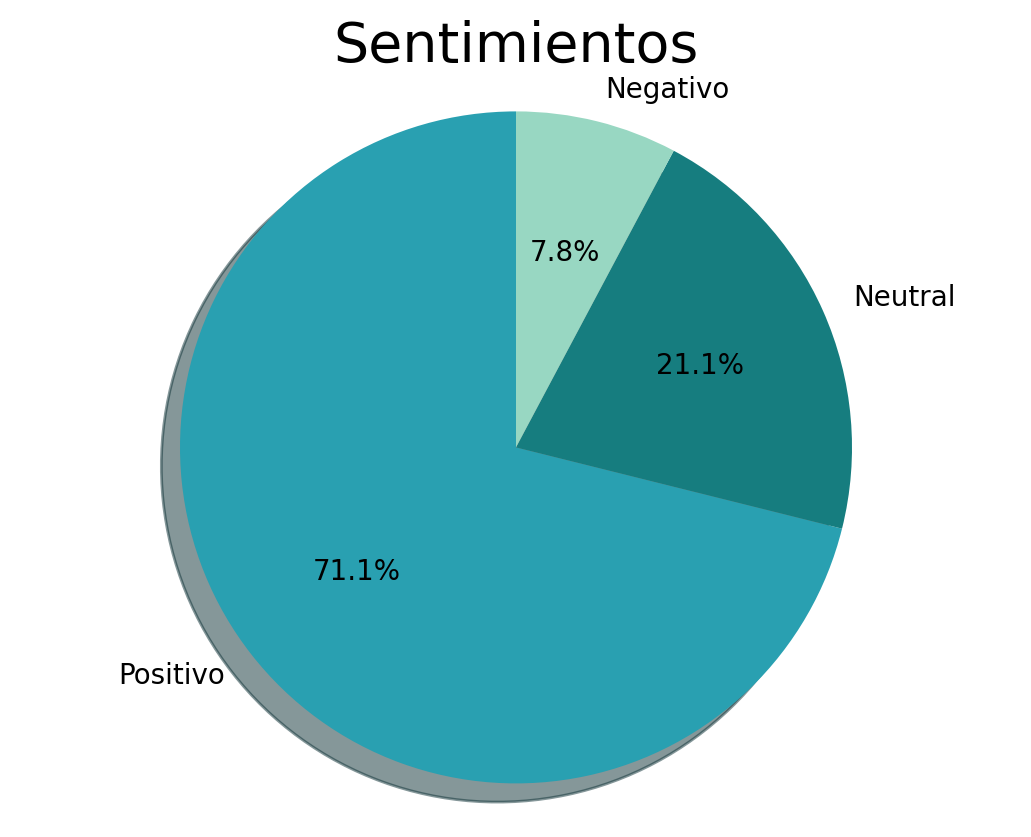

In [31]:
import matplotlib.pyplot as plt
labels = 'Positivo', 'Neutral', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(dfNew['SCORE'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Sentimientos', fontsize = 20)
plt.axis('equal')
plt.show()

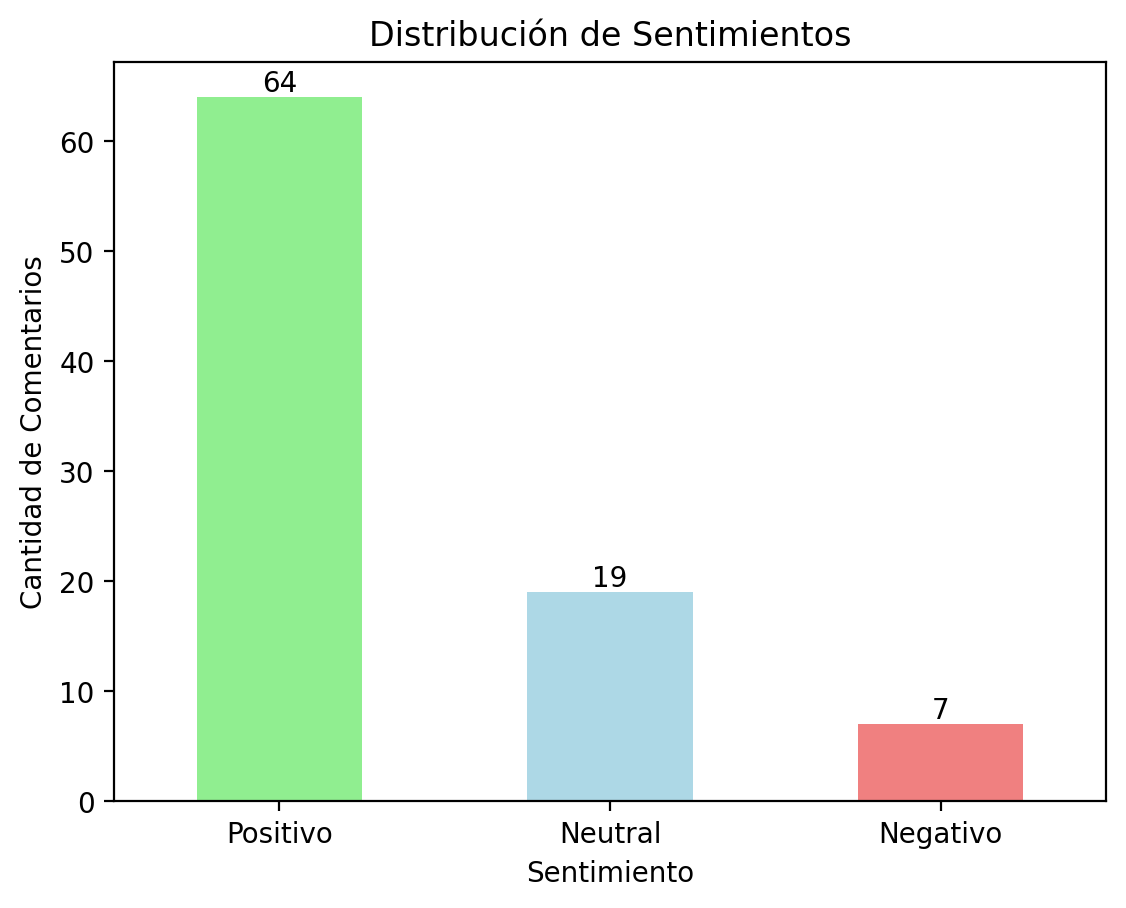

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con las columnas mencionadas en tus datos

# Gráfico de Barras para el Sentimiento con colores y etiquetas
sentimiento_counts = df['Sentimiento'].value_counts()
colors = ['lightgreen', 'lightblue', 'lightcoral']  # Colores para cada categoría de sentimiento
sentimiento_counts.plot(kind='bar', color=colors)
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')

# Agregar etiquetas en las barras
for i, count in enumerate(sentimiento_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xticks(rotation=0)  # Rotar las etiquetas del eje x
plt.show()

In [34]:
#Exportar excel

df.to_excel('datos_post.xlsx', index=False)

In [32]:
# Asignación aleatoria de datos de entrenamiento y prueba
import numpy as np
index = df.index
df['random_number'] = np.random.randn(len(index))
train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [ ]:
# Conteo de palabras
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['comment_ingles'])
test_matrix = vectorizer.transform(test['comment_ingles'])

In [ ]:
# REGRESION LINEAL
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_train = train_matrix
X_test = test_matrix
y_train = train['SCORE']
y_test = test['SCORE']

In [ ]:
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print(f'AUC de {nombre_modelo}: ', round(auc,2))

In [ ]:
#CALCULO DE ERROR REGRESION LOGISTICA
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)[:,1]

mide_error('Regresión Logística', y_pred)

AUC de Regresión Logística:  0.78


In [ ]:
#CALCULO DE ERROR NAIVE BAYES

from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict_proba(X_test)[:,1]

mide_error('Naive Bayes', y_pred)

AUC de Naive Bayes:  0.56


In [ ]:
#CALCULO DE ERROR ARBOL DE DECISION
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict_proba(X_test)[:,1]

mide_error('Árbol de Decisión', y_pred)

AUC de Árbol de Decisión:  1.0


In [ ]:
#CALCULO DE ERROR RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict_proba(X_test)[:,1]

mide_error('Random Forest', y_pred)

AUC de Random Forest:  1.0


In [ ]:
# find accuracy, precision, recall:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

array([[0, 0],
       [1, 9]])

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.90      0.95        10

    accuracy                           0.90        10
   macro avg       0.50      0.45      0.47        10
weighted avg       1.00      0.90      0.95        10



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
